In [1]:
#将数据分开

import pandas as pd
import os

# 读取Excel文件
reader = pd.read_excel('original_data.xlsx')

# 创建一个字典，用于存储每个物料编码的数据
grouped_data = {}

# 遍历每一行数据，将相同物料编码的数据分组
for index, row in reader.iterrows():
    num = row.iloc[1]  # 获取物料编码
    if num not in grouped_data:
        grouped_data[num] = []  # 如果该物料编码不在字典中，则创建一个新的列表
    grouped_data[num].append(row)  # 将行数据添加到对应物料编码的列表中

# 创建保存文件的目录
output_dir = 'output_materials'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 将每个物料编码的数据保存到一个新的Excel文件中
for num, data in grouped_data.items():
    # 将数据转换为DataFrame
    df = pd.DataFrame(data)
    
    # 重命名列
    df.columns = ['日期', '物料编码', '需求量', '销售单价']
    
    # 将DataFrame写入Excel文件，文件名为物料编码
    file_path = os.path.join(output_dir, f"{num}.xlsx")
    df.to_excel(file_path, index=False)

print("数据已成功保存到不同的Excel文件中。")


数据已成功保存到不同的Excel文件中。


In [2]:
#数据处理
"""
先读取刚才保存的每一个物料编码的数据，然后以2019/1/2作为第一周的开始，
将每一周的需求量数据相加，并求每一周的销售单价平均:
（第一天需求*第一天销售单价+第二天需求*第二天销售单价+...）/（一周总需求）  
。最后形成：周数 | 物料编码 | 需求量 | 销售单价 的表格，并覆盖原先的物料编码的表格
"""

import pandas as pd
import os
from datetime import datetime, timedelta

# 设置开始日期为2019/1/2
start_date = datetime(2019, 1, 2)

# 设置文件目录
input_dir = 'output_materials'

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)

        # 转换日期列为datetime格式
        df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

        # 计算每一周的需求量和平均销售单价
        weekly_data = []
        current_date = start_date
        week_number = 1

        while current_date <= df['日期'].max():
            week_end = current_date + timedelta(days=6)
            weekly_df = df[(df['日期'] >= current_date) & (df['日期'] <= week_end)]

            if not weekly_df.empty:
                total_demand = weekly_df['需求量'].sum()
                average_price = (weekly_df['需求量'] * weekly_df['销售单价']).sum() / total_demand

                weekly_data.append([week_number, df['物料编码'].iloc[0], total_demand, average_price])

            current_date += timedelta(days=7)
            week_number += 1

        # 将计算结果转换为DataFrame
        weekly_df = pd.DataFrame(weekly_data, columns=['周数', '物料编码', '需求量', '销售单价'])

        # 保存回原始Excel文件
        weekly_df.to_excel(file_path, index=False)

print("所有文件已更新并覆盖保存。")


所有文件已更新并覆盖保存。


In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 设置文件目录
input_dir = 'output_materials'

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)

        if df.empty:
            print(f"{file_name} is empty, skipping.")
            continue

        # 提取物料编码
        material_code = df['物料编码'].dropna().unique()[0]

        # 计算每周的收益（需求量 * 平均单价）
        df['收益'] = df['需求量'] * df['销售单价']

        # 绘制周数-需求量折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['需求量'], marker='o', linestyle='-', color='b')
        plt.title(f'{material_code} 每周需求量')
        plt.xlabel('周数')
        plt.ylabel('需求量')
        plt.grid(True)
        plt.savefig(os.path.join(input_dir, f'{material_code}_require.png'))
        plt.close()

        # 绘制周数-收益折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['收益'], marker='o', linestyle='-', color='g')
        plt.title(f'{material_code} 每周收益')
        plt.xlabel('周数')
        plt.ylabel('收益')
        plt.grid(True)
        plt.savefig(os.path.join(input_dir, f'{material_code}_income.png'))
        plt.close()

print("所有图像已保存为图片。")


6004020701.xlsx is empty, skipping.
6004020706.xlsx is empty, skipping.
6004021102.xlsx is empty, skipping.
所有图像已保存为图片。


In [3]:
#可能保存为矢量图会好一点？

import pandas as pd
import os
import matplotlib.pyplot as plt

# 设置文件目录
input_dir = 'output_materials'

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)

        if df.empty:
            print(f"{file_name} is empty, skipping.")
            continue

        # 提取物料编码
        material_code = df['物料编码'].dropna().unique()[0]

        # 计算每周的收益（需求量 * 平均单价）
        df['收益'] = df['需求量'] * df['销售单价']

        # 绘制周数-需求量折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['需求量'], marker='o', linestyle='-', color='b')
        plt.title(f'{material_code} 每周需求量')
        plt.xlabel('周数')
        plt.ylabel('需求量')
        plt.grid(True)
        # 保存为SVG格式的矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
        plt.close()

        # 绘制周数-收益折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['收益'], marker='o', linestyle='-', color='g')
        plt.title(f'{material_code} 每周收益')
        plt.xlabel('周数')
        plt.ylabel('收益')
        plt.grid(True)
        # 保存为SVG格式的矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
        plt.close()

print("所有图像已保存为SVG矢量图。")



C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

6004020701.xlsx is empty, skipping.


C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

6004020706.xlsx is empty, skipping.


C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDat

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

6004021102.xlsx is empty, skipping.


C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\App

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\Ap

C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:35: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
C:\Users\Yang Bangzhi\AppDa

所有图像已保存为SVG矢量图。


C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_10120\946017441.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')


In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置文件目录
input_dir = 'output_materials'

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)
        
        if df.empty:
            print(f"{file_name} is empty, skipping.")
            continue

        # 提取物料编码
        material_code = df['物料编码'].dropna().unique()[0]

        # 计算每周的收益（需求量 * 平均单价）
        df['收益'] = df['需求量'] * df['销售单价']

        # 绘制周数-需求量折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['需求量'], marker='o', linestyle='-', color='b')
        plt.title(f'{material_code} 每周需求量')
        plt.xlabel('周数')
        plt.ylabel('需求量')
        plt.grid(True)
        # 保存为SVG格式的矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_require.svg'), format='svg')
        plt.close()

        # 绘制周数-收益折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['收益'], marker='o', linestyle='-', color='g')
        plt.title(f'{material_code} 每周收益')
        plt.xlabel('周数')
        plt.ylabel('收益')
        plt.grid(True)
        # 保存为SVG格式的矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_income.svg'), format='svg')
        plt.close()

        # 绘制周数-平均价格折线图
        plt.figure(figsize=(10, 6))
        plt.plot(df['周数'], df['销售单价'], marker='o', linestyle='-', color='r')
        plt.title(f'{material_code} 每周平均价格')
        plt.xlabel('周数')
        plt.ylabel('平均价格')
        plt.grid(True)
        # 保存为SVG格式的矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_price.svg'), format='svg')
        plt.close()

print("所有图像已保存为SVG矢量图。")


6004020701.xlsx is empty, skipping.
6004020706.xlsx is empty, skipping.
6004021102.xlsx is empty, skipping.
所有图像已保存为SVG矢量图。


In [11]:
#合并图像

import pandas as pd
import os
import matplotlib.pyplot as plt

# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置文件目录
input_dir = 'output_materials'

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)

        if df.empty:
            print(f"{file_name} is empty, skipping.")
            continue

        # 提取物料编码
        material_code = df['物料编码'].dropna().unique()[0]

        # 计算每周的收益（需求量 * 平均单价）
        df['收益'] = df['需求量'] * df['销售单价']

        # 创建三纵轴图表
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # 绘制需求量折线图
        ax1.plot(df['周数'], df['需求量'], marker='o', linestyle='-', color='b', label='需求量')
        ax1.set_xlabel('周数')
        ax1.set_ylabel('需求量', color='b')
        ax1.tick_params(axis='y', labelcolor='b')

        # 创建第二个纵轴共享x轴
        ax2 = ax1.twinx()
        ax2.plot(df['周数'], df['收益'], marker='o', linestyle='-', color='g', label='收益')
        ax2.set_ylabel('收益', color='g')
        ax2.tick_params(axis='y', labelcolor='g')

        # 创建第三个纵轴共享x轴
        ax3 = ax1.twinx()
        ax3.spines['right'].set_position(('outward', 60))  # 右边第三个纵轴的间距
        ax3.plot(df['周数'], df['销售单价'], marker='o', linestyle='-', color='r', label='平均单价')
        ax3.set_ylabel('平均单价', color='r')
        ax3.tick_params(axis='y', labelcolor='r')

        # 添加标题
        plt.title(f'{material_code} 每周需求量、收益与平均单价')

        # 保存合并后的图像为SVG矢量图
        plt.savefig(os.path.join(input_dir, f'{material_code}_combined.svg'), format='svg')
        plt.close()

print("所有图像已合并并保存为SVG矢量图。")


6004020701.xlsx is empty, skipping.
6004020706.xlsx is empty, skipping.
6004021102.xlsx is empty, skipping.
所有图像已合并并保存为SVG矢量图。


In [9]:
#判断数据行数是否超过50行。
#使用自相关分析和傅里叶变换来判断周期性强度。
#使用多项式回归、时间序列模型（如ARIMA）和指数平滑模型进行拟合。
#计算交叉验证和残差分析，并将结果与拟合图一起保存。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft
import os

# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置文件目录
input_dir = 'output_materials'

# 创建函数来绘制和保存图像
def save_plot_with_fitting(df, model_name, material_code, y_pred, formula, cv_score, residuals):
    plt.figure(figsize=(10, 6))
    plt.plot(df['周数'], df['需求量'], marker='o', linestyle='-', color='b', label='实际需求量')
    plt.plot(df['周数'], y_pred, color='r', label=f'{model_name} 拟合')
    plt.title(f'{material_code} - {model_name} 拟合')
    plt.xlabel('周数')
    plt.ylabel('需求量')
    plt.legend()

    # 在图表下方显示拟合函数和其他信息
    plt.figtext(0.5, -0.1, f"拟合函数: {formula}\n交叉验证得分: {cv_score}\n残差均值: {residuals.mean():.2f}, 残差标准差: {residuals.std():.2f}", wrap=True, horizontalalignment='center', fontsize=12)

    # 保存为矢量图（.svg格式）
    file_name = f"{material_code}_{model_name}.svg"
    plt.savefig(os.path.join(input_dir, file_name), format='svg')
    plt.close()

# 遍历文件目录中的每个文件
for file_name in os.listdir(input_dir):
    if file_name.endswith('.xlsx'):
        # 读取每个物料编码对应的Excel文件
        file_path = os.path.join(input_dir, file_name)
        df = pd.read_excel(file_path)
        
        if len(df) < 40:
            print(f"{file_name} 数据行数不足40行，跳过。")
            continue
        
        material_code = df['物料编码'].iloc[0]

        # 自相关分析
        plot_acf(df['需求量'])
        plt.title(f'{material_code} 自相关分析')
        plt.savefig(os.path.join(input_dir, f'{material_code}_acf.svg'), format='svg')
        plt.close()

        # 傅里叶变换分析
        fft_vals = fft(df['需求量'])
        plt.plot(np.abs(fft_vals))
        plt.title(f'{material_code} 傅里叶变换')
        plt.savefig(os.path.join(input_dir, f'{material_code}_fft.svg'), format='svg')
        plt.close()

        # 多项式回归模型
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(df['周数'].values.reshape(-1, 1))
        poly_model = LinearRegression()
        poly_model.fit(X_poly, df['需求量'])
        y_pred_poly = poly_model.predict(X_poly)
        formula_poly = f'{poly_model.intercept_:.2f} + {poly_model.coef_[1]:.2f}*x + {poly_model.coef_[2]:.2f}*x^2'
        cv_score_poly = cross_val_score(poly_model, X_poly, df['需求量'], cv=5).mean()
        residuals_poly = df['需求量'] - y_pred_poly
        save_plot_with_fitting(df, '多项式回归', material_code, y_pred_poly, formula_poly, cv_score_poly, residuals_poly)

        # 时间序列模型（ARIMA）
        arima_model = ARIMA(df['需求量'], order=(1, 1, 1))
        arima_fit = arima_model.fit()
        y_pred_arima = arima_fit.predict(start=1, end=len(df), dynamic=False)
        formula_arima = 'ARIMA(1,1,1)'
        cv_score_arima = cross_val_score(LinearRegression(), df['周数'].values.reshape(-1, 1), df['需求量'], cv=5).mean()
        residuals_arima = df['需求量'] - y_pred_arima
        save_plot_with_fitting(df, '时间序列模型', material_code, y_pred_arima, formula_arima, cv_score_arima, residuals_arima)

        # 指数平滑模型
        exp_smooth_model = ExponentialSmoothing(df['需求量'], seasonal='add', seasonal_periods=12)
        exp_smooth_fit = exp_smooth_model.fit()
        y_pred_exp_smooth = exp_smooth_fit.fittedvalues
        formula_exp_smooth = 'Exponential Smoothing'
        cv_score_exp_smooth = cross_val_score(LinearRegression(), df['周数'].values.reshape(-1, 1), df['需求量'], cv=5).mean()
        residuals_exp_smooth = df['需求量'] - y_pred_exp_smooth
        save_plot_with_fitting(df, '指数平滑模型', material_code, y_pred_exp_smooth, formula_exp_smooth, cv_score_exp_smooth, residuals_exp_smooth)

print("所有拟合图像已保存。")


6004010068.xlsx 数据行数不足40行，跳过。
6004010116.xlsx 数据行数不足40行，跳过。
6004010121.xlsx 数据行数不足40行，跳过。
6004010134.xlsx 数据行数不足40行，跳过。
6004010205.xlsx 数据行数不足40行，跳过。
6004010215.xlsx 数据行数不足40行，跳过。
6004010217.xlsx 数据行数不足40行，跳过。
6004010231.xlsx 数据行数不足40行，跳过。
6004010237.xlsx 数据行数不足40行，跳过。
6004010239.xlsx 数据行数不足40行，跳过。
6004010248.xlsx 数据行数不足40行，跳过。
6004010249.xlsx 数据行数不足40行，跳过。
6004010250.xlsx 数据行数不足40行，跳过。
6004010252.xlsx 数据行数不足40行，跳过。
6004010259.xlsx 数据行数不足40行，跳过。
6004010270.xlsx 数据行数不足40行，跳过。
6004010273.xlsx 数据行数不足40行，跳过。
6004010279.xlsx 数据行数不足40行，跳过。
6004010281.xlsx 数据行数不足40行，跳过。
6004010284.xlsx 数据行数不足40行，跳过。
6004010286.xlsx 数据行数不足40行，跳过。
6004010287.xlsx 数据行数不足40行，跳过。
6004010288.xlsx 数据行数不足40行，跳过。
6004010290.xlsx 数据行数不足40行，跳过。
6004010312.xlsx 数据行数不足40行，跳过。
6004010313.xlsx 数据行数不足40行，跳过。
6004010314.xlsx 数据行数不足40行，跳过。
6004010316.xlsx 数据行数不足40行，跳过。
6004010320.xlsx 数据行数不足40行，跳过。
6004010321.xlsx 数据行数不足40行，跳过。
6004010322.xlsx 数据行数不足40行，跳过。
6004010323.xlsx 数据行数不足40行，跳过。
6004010325.xlsx 数据行数不足40行，跳过。
6004010327

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


6004021157.xlsx 数据行数不足40行，跳过。
6004021159.xlsx 数据行数不足40行，跳过。
6004021161.xlsx 数据行数不足40行，跳过。
6004100006.xlsx 数据行数不足40行，跳过。
6004100012.xlsx 数据行数不足40行，跳过。
所有拟合图像已保存。


In [12]:
#整理文件

import os
import re

# 设置原始文件目录和目标文件目录
original_dir = 'output_materials'
target_dir = 'output_materials'

# 遍历原始目录中的所有文件
for filename in os.listdir(original_dir):
    if os.path.isfile(os.path.join(original_dir, filename)):
        # 使用正则表达式匹配文件名前缀
        match = re.match(r'(\d+)', filename)
        if match:
            # 提取前缀数字
            prefix = match.group(1)
            # 创建新文件夹的路径
            new_dir_path = os.path.join(target_dir, prefix)
            # 如果文件夹不存在，则创建它
            if not os.path.exists(new_dir_path):
                os.makedirs(new_dir_path)
            # 构造原始文件的完整路径
            original_file_path = os.path.join(original_dir, filename)
            # 构造新文件夹中文件的完整路径
            new_file_path = os.path.join(new_dir_path, filename)
            # 移动文件
            os.rename(original_file_path, new_file_path)
            print(f'Moved {filename} to {new_dir_path}')

print("所有文件已按前缀分类并移动到相应的文件夹中。")

Moved 6004010068.xlsx to output_materials\6004010068
Moved 6004010068_acf.svg to output_materials\6004010068
Moved 6004010068_combined.svg to output_materials\6004010068
Moved 6004010068_fft.svg to output_materials\6004010068
Moved 6004010068_income.svg to output_materials\6004010068
Moved 6004010068_price.svg to output_materials\6004010068
Moved 6004010068_require.svg to output_materials\6004010068
Moved 6004010116.xlsx to output_materials\6004010116
Moved 6004010116_acf.svg to output_materials\6004010116
Moved 6004010116_combined.svg to output_materials\6004010116
Moved 6004010116_fft.svg to output_materials\6004010116
Moved 6004010116_income.svg to output_materials\6004010116
Moved 6004010116_price.svg to output_materials\6004010116
Moved 6004010116_require.svg to output_materials\6004010116
Moved 6004010116_多项式回归.svg to output_materials\6004010116
Moved 6004010116_时间序列模型.svg to output_materials\6004010116
Moved 6004010121.xlsx to output_materials\6004010121
Moved 6004010121_combine

Moved 6004010280_fft.svg to output_materials\6004010280
Moved 6004010280_income.svg to output_materials\6004010280
Moved 6004010280_price.svg to output_materials\6004010280
Moved 6004010280_require.svg to output_materials\6004010280
Moved 6004010280_多项式回归.svg to output_materials\6004010280
Moved 6004010280_指数平滑模型.svg to output_materials\6004010280
Moved 6004010280_时间序列模型.svg to output_materials\6004010280
Moved 6004010281.xlsx to output_materials\6004010281
Moved 6004010281_combined.svg to output_materials\6004010281
Moved 6004010281_income.svg to output_materials\6004010281
Moved 6004010281_price.svg to output_materials\6004010281
Moved 6004010281_require.svg to output_materials\6004010281
Moved 6004010284.xlsx to output_materials\6004010284
Moved 6004010284_combined.svg to output_materials\6004010284
Moved 6004010284_income.svg to output_materials\6004010284
Moved 6004010284_price.svg to output_materials\6004010284
Moved 6004010284_require.svg to output_materials\6004010284
Moved 600

Moved 6004010424_require.svg to output_materials\6004010424
Moved 6004010430.xlsx to output_materials\6004010430
Moved 6004010430_combined.svg to output_materials\6004010430
Moved 6004010430_income.svg to output_materials\6004010430
Moved 6004010430_price.svg to output_materials\6004010430
Moved 6004010430_require.svg to output_materials\6004010430
Moved 6004010432.xlsx to output_materials\6004010432
Moved 6004010432_combined.svg to output_materials\6004010432
Moved 6004010432_income.svg to output_materials\6004010432
Moved 6004010432_price.svg to output_materials\6004010432
Moved 6004010432_require.svg to output_materials\6004010432
Moved 6004010433.xlsx to output_materials\6004010433
Moved 6004010433_combined.svg to output_materials\6004010433
Moved 6004010433_income.svg to output_materials\6004010433
Moved 6004010433_price.svg to output_materials\6004010433
Moved 6004010433_require.svg to output_materials\6004010433
Moved 6004010437.xlsx to output_materials\6004010437
Moved 60040104

Moved 6004020482_income.svg to output_materials\6004020482
Moved 6004020482_price.svg to output_materials\6004020482
Moved 6004020482_require.svg to output_materials\6004020482
Moved 6004020484.xlsx to output_materials\6004020484
Moved 6004020484_combined.svg to output_materials\6004020484
Moved 6004020484_income.svg to output_materials\6004020484
Moved 6004020484_price.svg to output_materials\6004020484
Moved 6004020484_require.svg to output_materials\6004020484
Moved 6004020493.xlsx to output_materials\6004020493
Moved 6004020493_acf.svg to output_materials\6004020493
Moved 6004020493_combined.svg to output_materials\6004020493
Moved 6004020493_fft.svg to output_materials\6004020493
Moved 6004020493_income.svg to output_materials\6004020493
Moved 6004020493_price.svg to output_materials\6004020493
Moved 6004020493_require.svg to output_materials\6004020493
Moved 6004020493_多项式回归.svg to output_materials\6004020493
Moved 6004020493_指数平滑模型.svg to output_materials\6004020493
Moved 600402

Moved 6004020763_时间序列模型.svg to output_materials\6004020763
Moved 6004020764.xlsx to output_materials\6004020764
Moved 6004020764_combined.svg to output_materials\6004020764
Moved 6004020764_income.svg to output_materials\6004020764
Moved 6004020764_price.svg to output_materials\6004020764
Moved 6004020764_require.svg to output_materials\6004020764
Moved 6004020768.xlsx to output_materials\6004020768
Moved 6004020768_acf.svg to output_materials\6004020768
Moved 6004020768_combined.svg to output_materials\6004020768
Moved 6004020768_fft.svg to output_materials\6004020768
Moved 6004020768_income.svg to output_materials\6004020768
Moved 6004020768_price.svg to output_materials\6004020768
Moved 6004020768_require.svg to output_materials\6004020768
Moved 6004020768_多项式回归.svg to output_materials\6004020768
Moved 6004020768_指数平滑模型.svg to output_materials\6004020768
Moved 6004020768_时间序列模型.svg to output_materials\6004020768
Moved 6004020769.xlsx to output_materials\6004020769
Moved 6004020769_c

Moved 6004020854_income.svg to output_materials\6004020854
Moved 6004020854_price.svg to output_materials\6004020854
Moved 6004020854_require.svg to output_materials\6004020854
Moved 6004020855.xlsx to output_materials\6004020855
Moved 6004020855_acf.svg to output_materials\6004020855
Moved 6004020855_combined.svg to output_materials\6004020855
Moved 6004020855_fft.svg to output_materials\6004020855
Moved 6004020855_income.svg to output_materials\6004020855
Moved 6004020855_price.svg to output_materials\6004020855
Moved 6004020855_require.svg to output_materials\6004020855
Moved 6004020855_多项式回归.svg to output_materials\6004020855
Moved 6004020855_指数平滑模型.svg to output_materials\6004020855
Moved 6004020855_时间序列模型.svg to output_materials\6004020855
Moved 6004020856.xlsx to output_materials\6004020856
Moved 6004020856_combined.svg to output_materials\6004020856
Moved 6004020856_income.svg to output_materials\6004020856
Moved 6004020856_price.svg to output_materials\6004020856
Moved 6004020

Moved 6004020923_price.svg to output_materials\6004020923
Moved 6004020923_require.svg to output_materials\6004020923
Moved 6004020929.xlsx to output_materials\6004020929
Moved 6004020929_combined.svg to output_materials\6004020929
Moved 6004020929_income.svg to output_materials\6004020929
Moved 6004020929_price.svg to output_materials\6004020929
Moved 6004020929_require.svg to output_materials\6004020929
Moved 6004020930.xlsx to output_materials\6004020930
Moved 6004020930_combined.svg to output_materials\6004020930
Moved 6004020930_income.svg to output_materials\6004020930
Moved 6004020930_price.svg to output_materials\6004020930
Moved 6004020930_require.svg to output_materials\6004020930
Moved 6004020933.xlsx to output_materials\6004020933
Moved 6004020933_combined.svg to output_materials\6004020933
Moved 6004020933_income.svg to output_materials\6004020933
Moved 6004020933_price.svg to output_materials\6004020933
Moved 6004020933_require.svg to output_materials\6004020933
Moved 600

Moved 6004021096_acf.svg to output_materials\6004021096
Moved 6004021096_combined.svg to output_materials\6004021096
Moved 6004021096_fft.svg to output_materials\6004021096
Moved 6004021096_income.svg to output_materials\6004021096
Moved 6004021096_price.svg to output_materials\6004021096
Moved 6004021096_require.svg to output_materials\6004021096
Moved 6004021096_多项式回归.svg to output_materials\6004021096
Moved 6004021096_指数平滑模型.svg to output_materials\6004021096
Moved 6004021096_时间序列模型.svg to output_materials\6004021096
Moved 6004021097.xlsx to output_materials\6004021097
Moved 6004021097_acf.svg to output_materials\6004021097
Moved 6004021097_combined.svg to output_materials\6004021097
Moved 6004021097_fft.svg to output_materials\6004021097
Moved 6004021097_income.svg to output_materials\6004021097
Moved 6004021097_price.svg to output_materials\6004021097
Moved 6004021097_require.svg to output_materials\6004021097
Moved 6004021097_多项式回归.svg to output_materials\6004021097
Moved 6004021

In [19]:
#ADF测试

import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 创建保存图表的文件夹
output_dir = 'ADF_Differencing_Plots'
os.makedirs(output_dir, exist_ok=True)

# 读取Excel文件
file_path = './output_materials/6004020900/6004020900.xlsx'  # 修改为你的文件名
df = pd.read_excel(file_path)

# 提取时间和数据
time = df.iloc[:, 0]
data = df.iloc[:, 2]

# 绘制初始数据图表
plt.figure(figsize=(10, 6))
plt.plot(time, data, marker='o', linestyle='-', color='b')
plt.title('原始数据')
plt.xlabel('时间')
plt.ylabel('数据')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'original_data.png'))
plt.close()

# ADF平稳性测试函数
def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1]

# 初始ADF测试
p_value = adf_test(data)
difference_number = 0

# 如果数据不平稳，进行差分操作
while p_value > 0.05:
    difference_number += 1
    data_diff = np.diff(data, n=difference_number)
    data_diff = np.insert(data_diff, 0, 0)
    
    # 绘制差分后数据图表
    plt.figure(figsize=(10, 6))
    plt.plot(time, data_diff, marker='o', linestyle='-', color='b')
    plt.title(f'{difference_number}阶差分后数据')
    plt.xlabel('时间')
    plt.ylabel('差分数据')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'differenced_data_{difference_number}.png'))
    plt.close()
    
    # 再次进行ADF测试
    p_value = adf_test(data_diff)

print(f'数据在{difference_number}阶差分后平稳。')


ADF Statistic: -2.019088771208017
p-value: 0.27826656262718763
ADF Statistic: -9.485036789747918
p-value: 3.7827402197577234e-16
数据在1阶差分后平稳。


In [25]:
#求参数

import os
import pandas as pd
import numpy as np
import itertools
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 忽略警告信息
warnings.filterwarnings("ignore")

# 读取Excel文件
file_path = './output_materials/6004020503/6004020503.xlsx'  # 替换为你的文件名
df = pd.read_excel(file_path)

# 提取时间和数据
time = df.iloc[:, 0]
data = df.iloc[:, 2]

# ADF平稳性测试函数
def adf_test(data):
    result = adfuller(data)
    return result[1]

# 差分操作，直到数据平稳
d = 0
p_value = adf_test(data)

while p_value > 0.05:
    d += 1
    data = np.diff(data, n=1)
    p_value = adf_test(data)

# 确定p, d, q参数
p = range(0, 5)  # p参数的取值范围
q = range(0, 5)  # q参数的取值范围
pdq = list(itertools.product(p, [d], q))

# AIC和BIC最小值初始化
best_aic = float("inf")
best_bic = float("inf")
best_pdq_aic = None
best_pdq_bic = None

# 遍历所有p, d, q组合，选择AIC和BIC最小的组合
for param in pdq:
    try:
        model = sm.tsa.ARIMA(df.iloc[:, 2], order=param)
        results = model.fit()

        print(f'ARIMA{param} - AIC:{results.aic} - BIC:{results.bic}')

        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq_aic = param

        if results.bic < best_bic:
            best_bic = results.bic
            best_pdq_bic = param

    except Exception as e:
        continue

# 输出最佳参数
print(f'\n基于AIC选择的最佳ARIMA模型: ARIMA{best_pdq_aic} - AIC:{best_aic}')
print(f'基于BIC选择的最佳ARIMA模型: ARIMA{best_pdq_bic} - BIC:{best_bic}')


ARIMA(0, 0, 0) - AIC:1170.721480253492 - BIC:1176.6331343686945
ARIMA(0, 0, 1) - AIC:1168.838280842304 - BIC:1177.7057620151077
ARIMA(0, 0, 2) - AIC:1168.605746749803 - BIC:1180.429054980208
ARIMA(0, 0, 3) - AIC:1165.501744798226 - BIC:1180.2808800862322
ARIMA(0, 0, 4) - AIC:1166.819230098164 - BIC:1184.5541924437716
ARIMA(1, 0, 0) - AIC:1167.8287291436275 - BIC:1176.6962103164312
ARIMA(1, 0, 1) - AIC:1165.5158154430133 - BIC:1177.3391236734183
ARIMA(1, 0, 2) - AIC:1167.1923692904825 - BIC:1181.9715045784887
ARIMA(1, 0, 3) - AIC:1166.4678670457456 - BIC:1184.2028293913531
ARIMA(1, 0, 4) - AIC:1168.4547346076993 - BIC:1189.145524010908
ARIMA(2, 0, 0) - AIC:1167.1201015142415 - BIC:1178.9434097446465
ARIMA(2, 0, 1) - AIC:1167.2377071054602 - BIC:1182.0168423934665
ARIMA(2, 0, 2) - AIC:1168.7729759969798 - BIC:1186.5079383425873
ARIMA(2, 0, 3) - AIC:1166.5145242011245 - BIC:1187.2053136043332
ARIMA(2, 0, 4) - AIC:1169.940004966997 - BIC:1193.5866214278071
ARIMA(3, 0, 0) - AIC:1165.5825418

In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建文件夹用于保存图表
output_dir = "arima_model_results"
os.makedirs(output_dir, exist_ok=True)

# 读取数据
file_path = './output_materials/6004010256/6004010256.xlsx'  # 替换为你的文件名
df = pd.read_excel(file_path)

# 去除时间列为0的行
df = df[df['周数'] != 0]

# 提取数据列
data = df.iloc[:, 2].values

# 拆分训练集和验证集
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 设置ARIMA模型参数 (p, d, q)
p = 4  # 示例值，可调整
d = 0  # 示例值，可调整
q = 4  # 示例值，可调整

# ARIMA模型拟合 (最大似然估计)
model_mle = ARIMA(train, order=(p, d, q))
model_mle_fit = model_mle.fit()

# ARIMA模型拟合 (贝叶斯方法)
model_bayes = ARIMA(train, order=(p, d, q))
model_bayes_fit = model_bayes.fit(method='bfgs')

# 预测
train_pred_mle = model_mle_fit.predict(start=1, end=len(train), dynamic=False)
test_pred_mle = model_mle_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)

train_pred_bayes = model_bayes_fit.predict(start=1, end=len(train), dynamic=False)
test_pred_bayes = model_bayes_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)

# 计算MAE和RMSE
train_mae_mle = mean_absolute_error(train, train_pred_mle)
test_mae_mle = mean_absolute_error(test, test_pred_mle)
train_rmse_mle = np.sqrt(mean_squared_error(train, train_pred_mle))
test_rmse_mle = np.sqrt(mean_squared_error(test, test_pred_mle))

train_mae_bayes = mean_absolute_error(train, train_pred_bayes)
test_mae_bayes = mean_absolute_error(test, test_pred_bayes)
train_rmse_bayes = np.sqrt(mean_squared_error(train, train_pred_bayes))
test_rmse_bayes = np.sqrt(mean_squared_error(test, test_pred_bayes))

# 打印误差指标
print(f'MLE - 训练集MAE: {train_mae_mle}, 测试集MAE: {test_mae_mle}, 训练集RMSE: {train_rmse_mle}, 测试集RMSE: {test_rmse_mle}')
print(f'Bayes - 训练集MAE: {train_mae_bayes}, 测试集MAE: {test_mae_bayes}, 训练集RMSE: {train_rmse_bayes}, 测试集RMSE: {test_rmse_bayes}')

# 检查残差序列是否为白噪声
residuals_mle = model_mle_fit.resid
residuals_bayes = model_bayes_fit.resid

# Ljung-Box检验（用于检测序列是否为白噪声）
lb_test_mle = acorr_ljungbox(residuals_mle, lags=[10], return_df=True)
lb_test_bayes = acorr_ljungbox(residuals_bayes, lags=[10], return_df=True)
print("MLE Ljung-Box Test p-values:\n", lb_test_mle)
print("Bayes Ljung-Box Test p-values:\n", lb_test_bayes)

# 绘制ACF和PACF图
plt.figure(figsize=(12, 8))
plt.subplot(221)
plot_acf(residuals_mle, lags=20, ax=plt.gca())
plt.title('MLE ACF')
plt.subplot(222)
plot_pacf(residuals_mle, lags=20, ax=plt.gca())
plt.title('MLE PACF')

plt.subplot(223)
plot_acf(residuals_bayes, lags=20, ax=plt.gca())
plt.title('Bayes ACF')
plt.subplot(224)
plot_pacf(residuals_bayes, lags=20, ax=plt.gca())
plt.title('Bayes PACF')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'acf_pacf_plots.svg'), format='svg')
plt.close()

# 可视化预测与真实数据的对比
plt.figure(figsize=(10, 6))
plt.plot(train, label='训练集实际数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='验证集实际数据')
plt.plot(train_pred_mle, label='MLE 预测数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test_pred_mle, label='MLE 验证集预测')
plt.legend()
plt.title('MLE 预测结果')
plt.savefig(os.path.join(output_dir, 'mle_prediction.svg'), format='svg')
plt.close()

plt.figure(figsize=(10, 6))
plt.plot(train, label='训练集实际数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='验证集实际数据')
plt.plot(train_pred_bayes, label='Bayes 预测数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test_pred_bayes, label='Bayes 验证集预测')
plt.legend()
plt.title('Bayes 预测结果')
plt.savefig(os.path.join(output_dir, 'bayes_prediction.svg'), format='svg')
plt.close()


ValueError: "bfgs" is not a valid estimator.

In [13]:
#上面代码的阉割版

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建文件夹用于保存图表
output_dir = "arima_model_results"
os.makedirs(output_dir, exist_ok=True)

# 读取数据
file_path = './output_materials/6004010256/6004010256.xlsx'  # 替换为你的文件名
df = pd.read_excel(file_path)

# 去除时间列为0的行
df = df[df['周数'] != 0]

# 提取数据列
data = df.iloc[:, 2].values

# 拆分训练集和验证集
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 设置ARIMA模型参数 (p, d, q)
p = 1  # 示例值，可调整
d = 1  # 示例值，可调整
q = 0  # 示例值，可调整

# ARIMA模型拟合 (最大似然估计)
model_mle = ARIMA(train, order=(p, d, q))
model_mle_fit = model_mle.fit()

# 预测
train_pred_mle = model_mle_fit.predict(start=1, end=len(train), dynamic=False)
test_pred_mle = model_mle_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=True)

# 计算MAE和RMSE
train_mae_mle = mean_absolute_error(train, train_pred_mle)
test_mae_mle = mean_absolute_error(test, test_pred_mle)
train_rmse_mle = np.sqrt(mean_squared_error(train, train_pred_mle))
test_rmse_mle = np.sqrt(mean_squared_error(test, test_pred_mle))

# 打印误差指标
print(f'MLE - 训练集MAE: {train_mae_mle}, 测试集MAE: {test_mae_mle}, 训练集RMSE: {train_rmse_mle}, 测试集RMSE: {test_rmse_mle}')

# 检查残差序列是否为白噪声
residuals_mle = model_mle_fit.resid

# Ljung-Box检验（用于检测序列是否为白噪声）
lb_test_mle = acorr_ljungbox(residuals_mle, lags=[10], return_df=True)
print("MLE Ljung-Box Test p-values:\n", lb_test_mle)

# 绘制ACF和PACF图
plt.figure(figsize=(12, 8))
plt.subplot(121)
plot_acf(residuals_mle, lags=20, ax=plt.gca())
plt.title('MLE ACF')
plt.subplot(122)
plot_pacf(residuals_mle, lags=20, ax=plt.gca())
plt.title('MLE PACF')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'acf_pacf_plots.svg'), format='svg')
plt.close()

# 可视化预测与真实数据的对比
plt.figure(figsize=(10, 6))
plt.plot(train, label='训练集实际数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test, label='验证集实际数据')
plt.plot(train_pred_mle, label='MLE 预测数据')
plt.plot(np.arange(len(train), len(train) + len(test)), test_pred_mle, label='MLE 验证集预测')
plt.legend()
plt.title('MLE 预测结果')
plt.savefig(os.path.join(output_dir, 'mle_prediction.svg'), format='svg')
plt.close()


MLE - 训练集MAE: 2.905153756865784, 测试集MAE: 3.6507596852215376, 训练集RMSE: 4.006854034274052, 测试集RMSE: 5.242998299450984
MLE Ljung-Box Test p-values:
       lb_stat     lb_pvalue
10  50.524935  2.136685e-07


In [21]:
#数据填补，缺失填0

import pandas as pd

# 读取Excel文件
file_path = './6004020900.xlsx'  # 替换为您的文件路径
df = pd.read_excel(file_path)

# 检查第一列（假设是周数）并找出缺失的周数
expected_weeks = pd.Series(range(1, 178))  # 从1到177的周数
actual_weeks = df.iloc[:, 0].dropna()  # 取出第一列并去除空值
missing_weeks = expected_weeks[~expected_weeks.isin(actual_weeks)]

# 为缺失的周数创建新的DataFrame
missing_data = pd.DataFrame({
    '周数': missing_weeks,
    '物料编码': ['6004020900'] * len(missing_weeks),  # 假设第二列是固定的编码
    '需求量': [0] * len(missing_weeks),  # 假设第三列是固定的数值0
    '销售单价': [None] * len(missing_weeks)  # 第四列是null
})

# 将新创建的行添加到原始DataFrame中
df = pd.concat([df, missing_data], ignore_index=True)

# 将更新后的DataFrame按周数排序
df = df.sort_values(by='周数')

# 将更新后的DataFrame保存到新的Excel文件中
output_file_path = 'updated_file.xlsx'  # 您可以自定义输出文件名
df.to_excel(output_file_path, index=False)

print(f'文件已更新并保存至：{output_file_path}')

文件已更新并保存至：updated_file.xlsx


C:\Users\Yang Bangzhi\AppData\Local\Temp\ipykernel_1844\2320967979.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, missing_data], ignore_index=True)


D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


最优ARIMA模型参数: (4, 0, 3)


D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


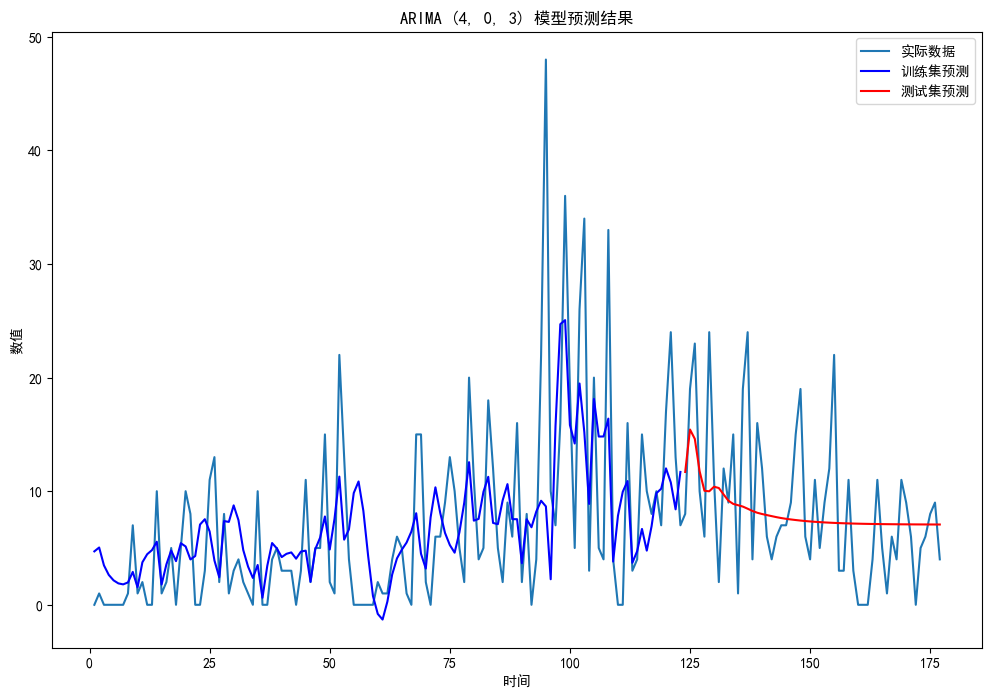

"\nplt.figure(figsize=(12, 6))\nplt.plot(test.index, relative_error, label='相对误差')\nplt.xlabel('时间')\nplt.ylabel('相对误差')\nplt.title('预测相对误差')\nplt.legend()\nplt.show()\n"

In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取时间序列数据
file_path = './updated_file.xlsx'
df = pd.read_excel(file_path)

# 选择时间序列数据
time_series = df.iloc[:, 2]  # 第三列是数据
time_series.index = pd.RangeIndex(start=1, stop=len(time_series) + 1, step=1)

# 划分数据集，70% 作为训练集，30% 作为验证集
train_size = int(len(time_series) * 0.7)
train, test = time_series[:train_size], time_series[train_size:]

# 定义p, d, q
p = 4
d = 0
q = 3
param = (p , d , q)

# 初始化存储结果的列表
results = []


# ARIMA模型拟合
model = ARIMA(train, order=param)
model_fit = model.fit()
        
# 预测
train_pred = model_fit.predict(start=1, end=len(train), dynamic=False)
test_pred = model_fit.forecast(steps=len(test))

# ji算误差
train_mae = mean_absolute_error(train, train_pred)
train_rmse = np.sqrt(mean_squared_error(train, train_pred))
test_mae = mean_absolute_error(test, test_pred)
test_rmse = np.sqrt(mean_squared_error(test, test_pred))
        
# 保存结果
results.append((param, train_mae, train_rmse, test_mae, test_rmse))

# 将结果转换为DataFrame并保存
results_df = pd.DataFrame(results, columns=['参数(p,d,q)', '训练集MAE', '训练集RMSE', '测试集MAE', '测试集RMSE'])
results_df.to_csv('arima_model_results.csv', index=False)

# 找到测试集上MAE最小的参数组合
best_result = results_df.loc[results_df['测试集MAE'].idxmin()]
best_order = best_result['参数(p,d,q)']
print(f"最优ARIMA模型参数: {best_order}")

# 使用最优参数进行重新拟合
model_best = ARIMA(train, order=best_order)
model_best_fit = model_best.fit()

# 进行预测
train_pred_best = model_best_fit.predict(start=1, end=len(train), dynamic=False)
test_pred_best = model_best_fit.forecast(steps=len(test))

# 可视化结果
plt.figure(figsize=(12, 8))
plt.plot(time_series.index, time_series, label='实际数据')
plt.plot(train.index, train_pred_best, label='训练集预测', color='blue')
plt.plot(test.index, test_pred_best, label='测试集预测', color='red')
plt.xlabel('时间')
plt.ylabel('数值')
plt.title(f'ARIMA {best_order} 模型预测结果')
plt.legend()
plt.show()

"""
# 计算预测误差的绝对值（上一周的预测值减去下一周的实际值）/下一周的实际值
relative_error = abs((test_pred_best[:-1] - test.values[1:]) / test.values[1:])
relative_error = np.append(relative_error, np.nan)  # 补全最后一项

"""
"""
plt.figure(figsize=(12, 6))
plt.plot(test.index, relative_error, label='相对误差')
plt.xlabel('时间')
plt.ylabel('相对误差')
plt.title('预测相对误差')
plt.legend()
plt.show()
"""

In [24]:
import pandas as pd

# 读取xlsx表格中的数据
file_path = './6004010256.xlsx' # 替换为实际文件路径

# 读取 Excel 文件
df = pd.read_excel(file_path)

# 选择时间和需求量数据
time = df.iloc[:, 0]  # 第一列是时间
demand = df.iloc[:, 2]  # 第三列是需求量

# 去除需求量的零值
non_zero_demand = demand[demand != 0]

# 计算非零需求量的平均值
average_demand = non_zero_demand.mean()

print(f"Average demand (excluding zero values): {average_demand}")

Average demand (excluding zero values): 8.97972972972973
